## Lab-01 Data Analysis and Visualization

In [1]:
from __future__ import division, print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline 

In [2]:
#Load the dataset
data_path = os.path.join('../iaml2017/datasets/','spambase.csv')
spambase = pd.read_csv(data_path,delimiter=',')

In [3]:
spambase.head(5)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0


In [4]:
list(map(lambda key:(spambase[key].std(),spambase[key].mean()),spambase.columns))

[(0.3053575620234699, 0.10455335796565964),
 (1.2905751909453214, 0.21301456205172786),
 (0.5041428838471842, 0.28065637904803303),
 (1.3951513704928833, 0.06542490762877635),
 (0.672512769284666, 0.312223429689198),
 (0.2738240830098081, 0.09590089111062812),
 (0.391441354750631, 0.11420778091719191),
 (0.4010714524736481, 0.10529450119539231),
 (0.27861586424183615, 0.09006737665724841),
 (0.6447553994517129, 0.23941317104977178),
 (0.20154466405444352, 0.05982395131493154),
 (0.8616984712807692, 0.5417018039556618),
 (0.3010358035849219, 0.09392958052597261),
 (0.33518382975575867, 0.05862638556835471),
 (0.2588434513226127, 0.04920452075635731),
 (0.8257917011289012, 0.24884807650510754),
 (0.44405532898215777, 0.14258639426211694),
 (0.5311224220069769, 0.18474462073462292),
 (1.7754806647661605, 1.662099543577483),
 (0.5097668889532868, 0.0855770484677244),
 (1.200809811626566, 0.809760921538796),
 (1.0257555914314398, 0.12120191262768963),
 (0.3502864185580466, 0.101645294501195

In [5]:
spambase = spambase.drop(columns = ['capital_run_length_average','capital_run_length_longest','capital_run_length_total'])

# Two ways to drop a columns

"""
    dataFrameObject.drop(columns = ['column_name',...])
    dataFrameObject.drop(index = ['column_name',...])
    dataFrameObject.drop(['column_name',...],axis=1)

"""



"\n    dataFrameObject.drop(columns = ['column_name',...])\n    dataFrameObject.drop(index = ['column_name',...])\n    dataFrameObject.drop(['column_name',...],axis=1)\n\n"

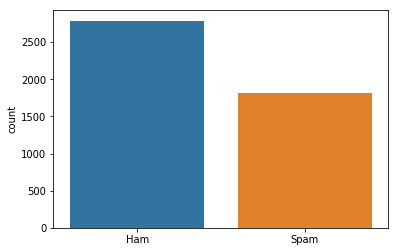

In [6]:

ax = sns.countplot(x="is_spam",data=spambase)
ax.set_xticklabels(['Ham','Spam'])
plt.xlabel('')
plt.show()

In [7]:
spambase_binary = spambase.copy(deep=True)

In [8]:
spambase_binary.iloc[0][0] = 1 if spambase_binary.iloc[0][0] > 0 else -1

In [9]:
spambase_binary.iloc[0][0]

-1.0

In [10]:
spambase_binary.iloc[0][0] = 0

In [11]:
spambase_binary[spambase_binary > 0] = 1

In [12]:
spambase_binary

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,is_spam
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


In [13]:
spambase_binary.tail(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,is_spam
4596,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4598,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4599,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4600,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
spambase_binary[['word_freq_make','is_spam']].values

array([[0., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 0.]])

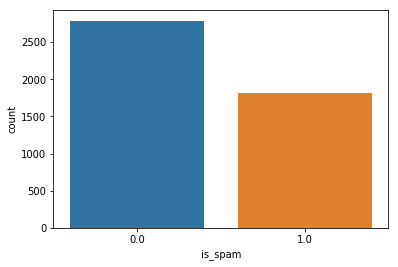

In [19]:
sns.countplot(x='is_spam',data=spambase_binary[['word_freq_make','is_spam']])

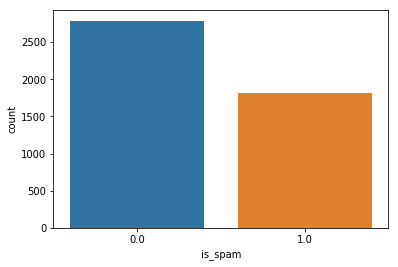

In [20]:
ax = sns.countplot(x='is_spam',data=spambase_binary[['word_freq_internet','is_spam']])

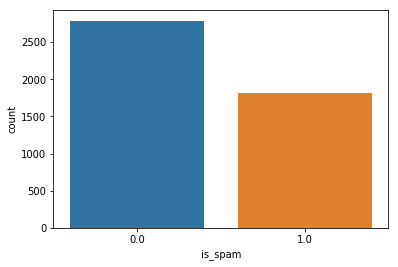

In [21]:
sns.countplot(x='is_spam',data=spambase_binary[['word_freq_edu','is_spam']])

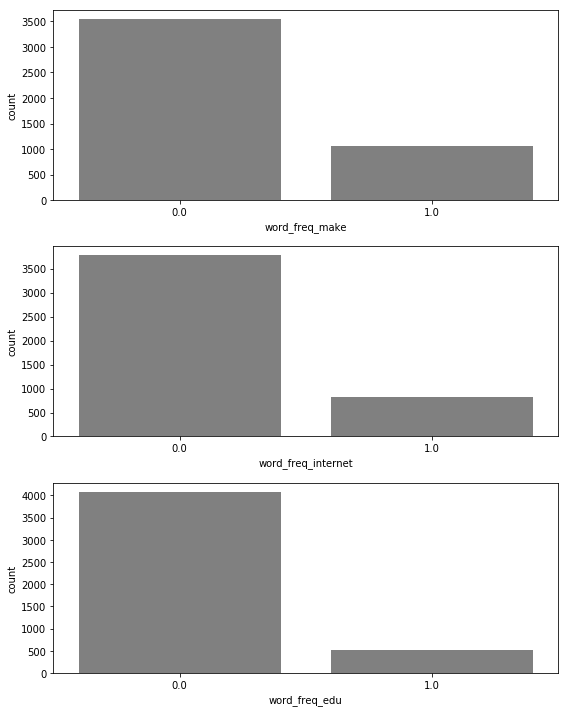

In [28]:
words_of_interest = ['word_freq_'+ word for word in ['make','internet','edu']]

words = len(words_of_interest)
plt.subplots(words,figsize=(8,10))
for index,word in enumerate(words_of_interest):
    plt.subplot(words,1,index+1)
    sns.countplot(x=word,data=spambase_binary,color='Gray')

plt.tight_layout()
plt.show()




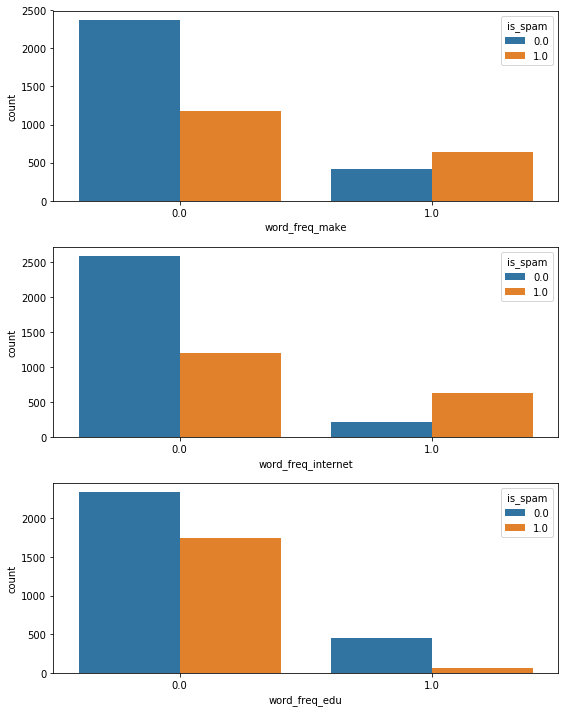

In [31]:
words_of_interest = ['word_freq_'+ word for word in ['make','internet','edu']]

words = len(words_of_interest)
plt.subplots(words,figsize=(8,10))
for index,word in enumerate(words_of_interest):
    plt.subplot(words,1,index+1)
    sns.countplot(x=word,data=spambase_binary,hue='is_spam')

plt.tight_layout()
plt.show()

In [50]:
x = spambase_binary.drop('is_spam',axis=1)

In [51]:
y = spambase_binary['is_spam']

In [52]:
x.shape

(4601, 54)

In [53]:
y.shape

(4601,)

In [37]:
print('Input features is of shape: {}'.format(x.shape))
print('Targets shape: {}'.format(y.shape))

Input features is of shape: (4601, 54)
Targets shape: (4601,)


In [39]:
mnb = MultinomialNB()

In [40]:
mnb.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
'Class log-priors: {}'.format(mnb.class_log_prior_)

'Class log-priors: [-0.50094918 -0.93129074]'

In [55]:
predictions = mnb.predict(x)

In [58]:
# Classification accuracy is calculated by accuracy_score or using score method of MultiNomialNB
classification_accuracy = accuracy_score(y,predictions)

# Classification accuracy calculated by score method
mnb_classification_accuracy = mnb.score(x,y)

In [59]:
mnb_classification_accuracy

0.8924146924581613

In [60]:
classification_accuracy

0.8924146924581613

In [62]:
cm =confusion_matrix(y,predictions)

In [63]:
cm

array([[2412,  376],
       [ 119, 1694]])

In [68]:
print(type(np.newaxis))

<class 'NoneType'>


In [75]:
l = list(range(10))

l[::-1]


[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [77]:
np.eye(3)[:,np.newaxis]

array([[[1., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]]])

In [78]:
cm_norm = cm/cm.sum(axis=1)[:,np.newaxis]

In [79]:
cm_norm

array([[0.8651363 , 0.1348637 ],
       [0.06563707, 0.93436293]])

In [80]:
cm.sum(axis=1)

array([2788, 1813])

In [85]:
cm/cm.sum(axis=1)[:,np.newaxis]

array([[0.8651363 , 0.1348637 ],
       [0.06563707, 0.93436293]])

In [86]:
cm_norm

array([[0.8651363 , 0.1348637 ],
       [0.06563707, 0.93436293]])

In [87]:
def plot_confusion_matrix(cm,classes=None,title='Confusion matrix'):
    
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes,yticklabels=classes,vmin=0.,vmax=1.,annot=True)
    else:
        sns.heatmap(cm,vmin=0.,vmax=1.)

    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

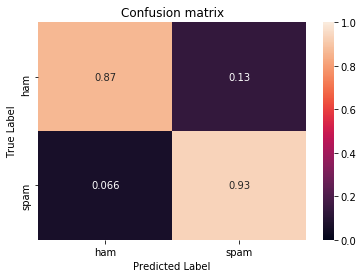

In [88]:
plt.figure()
plot_confusion_matrix(cm_norm,classes=['ham','spam'])